In [ ]:
!pip install Pillow
!pip install transformers

In [93]:
from PIL import Image
from pathlib import Path
from transformers import CLIPProcessor, CLIPModel, CLIPConfig
import time
import os
import requests
from IPython import display
# see details about the model here https://huggingface.co/docs/transformers/model_doc/clip

config = CLIPConfig.from_pretrained('openai/clip-vit-base-patch32')
#model = CLIPModel(config)
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



In [91]:
# white glass bottle: https://images.unsplash.com/photo-1591704951890-0862b2e98acb?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=3086&q=80
# plastic bottle: https://img.fruugo.com/product/2/06/264676062_max.jpg
#url = "https://images.immediate.co.uk/production/volatile/sites/30/2017/01/Bunch-of-bananas-67e91d5.jpg"
# washing machine
url = "https://i.insider.com/54086bd5eab8ea7118cc6051"
image = Image.open(requests.get(url, stream=True).raw)
display.Image(url=url)


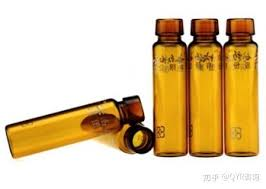

In [61]:
local_image = "images/brown-glass/brown-glass1.jpg"
image = Image.open(local_image)
display.Image(local_image)


In [94]:
start = time.time()

classes = [ "plastic",
            "white glass",
            "colored glass",
            "paper",
            "organic",
            "electrical appliance",
            "wood",
            "bulky waste",
            "medicine", 
            "medicine colored glass",            
            "battery",
            "accumulator",
            "energy-saving lamp",
            "metal"
           ]
texts = [f"a photo of object(s) made of {elem}" for elem in classes]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1).detach().numpy() # we can take the softmax to get the label prob

#print(probs)
print(f"Clip is {probs.max()*100:.2f}% sure the object is {classes[probs.argmax()]}")
print("\n")
for (idx, prob) in enumerate(probs[0]):
  if idx != probs.argmax():
    print(f"{prob*100:.2f}% {classes[idx]}")

Clip is 61.53% sure the object is Electrical appliance


0.85% plastic
3.54% white glass
0.01% colored glass
0.26% paper
1.22% organic
0.02% wood
31.11% bulky waste
0.08% medicine
0.01% medicine colored glass
0.56% battery
0.71% accumulator
0.10% energy-saving lampmetal
